
# Prática 7 - Plantão dia 20/08/2022


***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**


Nesta prática vamos desenvolver análises preditivas para os dados VALE3 e Ibovespa de julho de 2020 a julho de 2021.

**Carregue os pacotes que serão utilizados e faça a leitura dos dados, completando os dados faltantes como visto em aula.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("figure",figsize=(12,6))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style("darkgrid")

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

**Carregue as bibliotecas e faça a leitura dos dados VALE3 e Ibovespa. Utilizaremos a variável Close de ambos, sendo que do Ibovespa será dividido por mil.**

In [2]:
#pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'
#df = pd.read_csv(f'{pkgdir}/VALE3.csv', index_col=0, parse_dates=True)

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/VALE3.csv', index_col=0, parse_dates=True)

idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
df = df.reindex(idx)

df.fillna(method='ffill', inplace=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


In [3]:
#df2 = pd.read_csv(f'{pkgdir}/Ibovespa.csv', index_col=0, parse_dates=True)

df2 = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/Ibovespa.csv', index_col=0, parse_dates=True)

idx = pd.date_range(start=df2.index.min(), end=df2.index.max(), freq='B')
df2 = df2.reindex(idx)

df2.fillna(method='ffill', inplace=True)

df2.head()

,Open,High,Low,Close,Adj Close,Volume
2020-07-22,104312.0,104980.0,103277.0,104290.0,104290.0,10833700.0
2020-07-23,104291.0,104949.0,102119.0,102293.0,102293.0,10366600.0
2020-07-24,102292.0,102694.0,100859.0,102382.0,102382.0,9795200.0
2020-07-27,102381.0,104585.0,102381.0,104477.0,104477.0,9622400.0
2020-07-28,104477.0,104663.0,103592.0,104109.0,104109.0,9087100.0


**Faça visualizações das séries VALE3 e Ibovespa.**

In [4]:
plt.rcParams['figure.figsize'] = [14,8]

<AxesSubplot:>

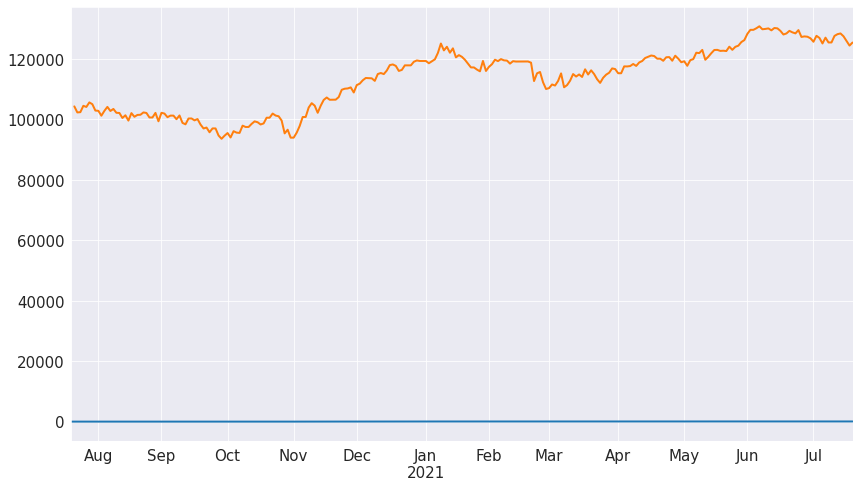

In [5]:
df['Close'].plot()
df2['Close'].plot()

In [6]:
df['IBOV'] = df2['Close']/1000

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,IBOV
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,NaN
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,104.290
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,102.293
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,102.382
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,104.477
...,...,...,...,...,...,...,...
2021-07-14,116.260002,116.430000,114.440002,115.120003,115.120003,19483600.0,128.407
2021-07-15,114.989998,116.160004,114.500000,115.480003,115.480003,18236100.0,127.468
2021-07-16,115.339996,115.870003,113.000000,113.400002,113.400002,19576800.0,125.960
2021-07-19,112.000000,112.160004,110.209999,112.160004,112.160004,18644300.0,124.395


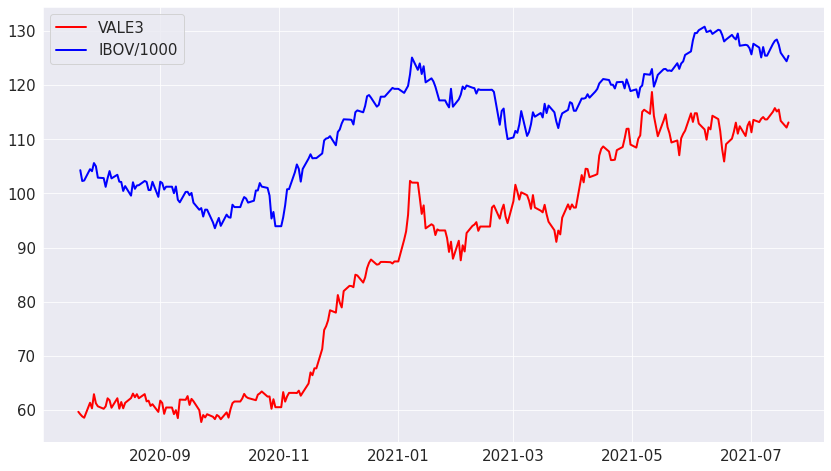

In [8]:
plt.plot(df['Close'],  color = 'red', label = 'VALE3')
plt.plot(df['IBOV'], color='blue', label='IBOV/1000')


plt.legend()
plt.show()



**Defina bases de treino e teste, deixando 30 observações para a base de teste.**

In [9]:
treino = df.iloc[:-30]
teste = df.iloc[-30:]

**Faça uma decomposição da série Close da VALE3 em tendência, sazonalidade e resíduos. Qual o período de sazonalidade mais adequado?**

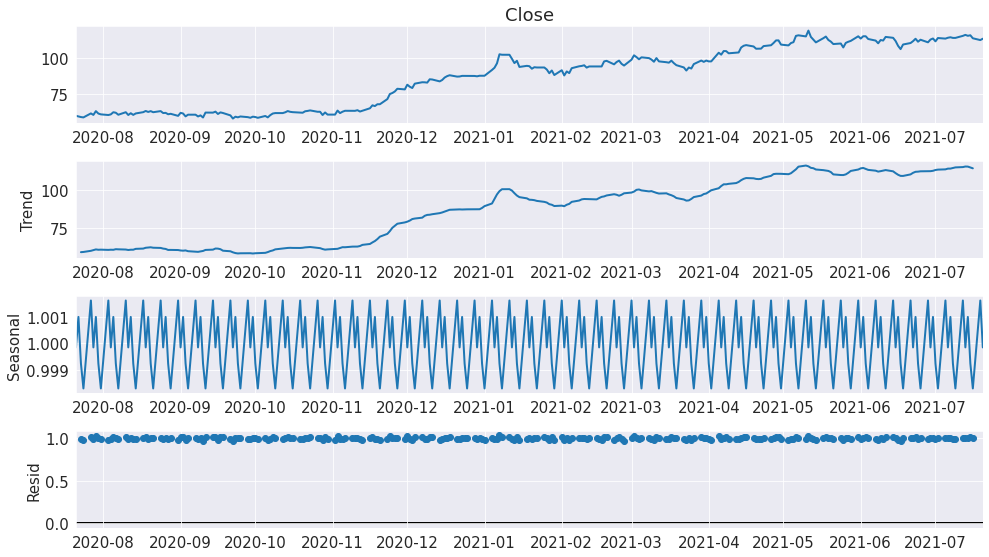

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(df['Close'], model='multiplicative', period=5)
result.plot()

pyplot.show()

**Obtenha as previsões pelo Método Theta para a série de dados de treino da VALE3.**

In [11]:
from statsmodels.tsa.forecasting.theta import ThetaModel
tm = ThetaModel(treino['Close'])
res = tm.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  Close   No. Observations:                  231
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Fri, 19 Aug 2022   Deseas. Method:         Multiplicative
Time:                        19:16:55   Period:                              5
Sample:                    07-21-2020                                         
                         - 06-08-2021                                         
   Parameter Estimates   
           Parameters    
-------------------------
b0    0.27978560620158865
alpha  0.9204099302864889
-------------------------


In [12]:
res = ThetaModel(treino['Close'],deseasonalize=True,period=5).fit()
fcast = res.forecast(30)

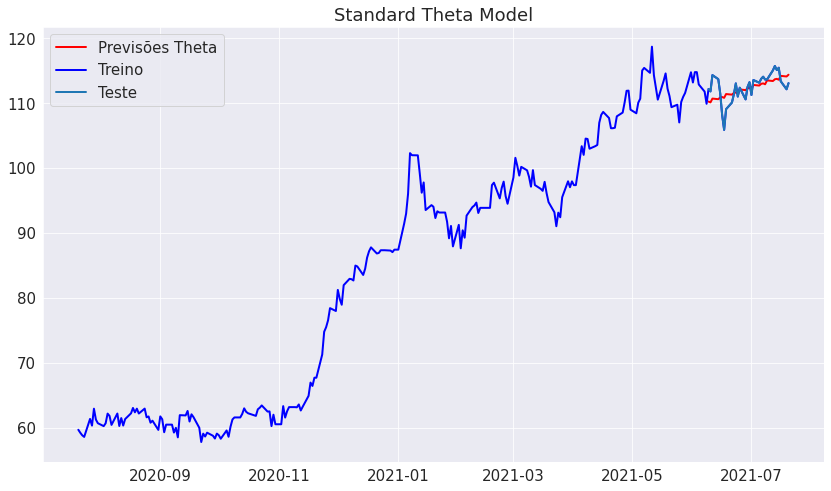

In [13]:
plt.plot(fcast,  color = 'red', label = 'Previsões Theta')
plt.plot(df['Close'],color = 'blue', label = 'Treino')
plt.plot(teste['Close'], label='Teste')
            
plt.title('Standard Theta Model')
plt.legend()
plt.show()

**Aplique o Método de Holt para os dados de teste e preveja as próximas 30 observações.**

In [14]:
# Método de Holt 

from statsmodels.tsa.api import ExponentialSmoothing

modelo_H =  ExponentialSmoothing(treino['Close'], trend='add');
 
ajustado = modelo_H.fit();

df['Holt'] = ajustado.fittedvalues.shift(-1);

predito_H = ajustado.forecast(30).rename('Previsão Holt')




**Represente graficamente os resultados, com as bases de treino e teste.**

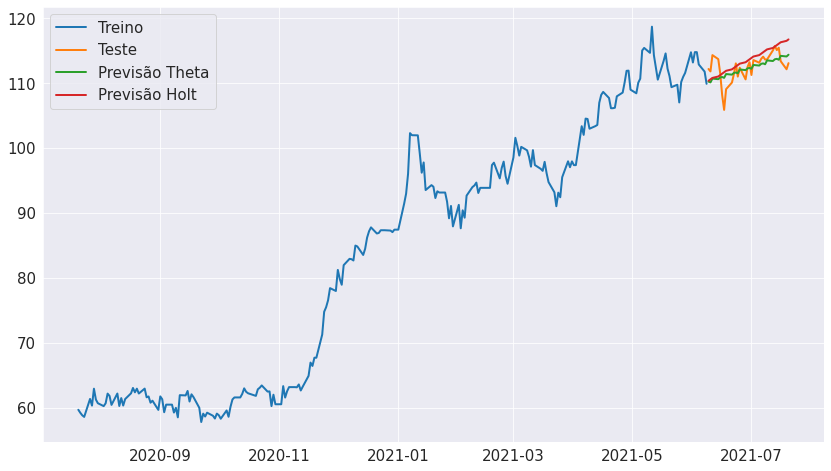

In [15]:
plt.plot(treino['Close'], label='Treino')
plt.plot(teste['Close'], label='Teste')
plt.plot(fcast, label='Previsão Theta')
plt.plot(predito_H, label='Previsão Holt')

plt.legend()
plt.show()


In [16]:
teste['Holt'] = predito_H
teste['Theta'] = fcast
teste

,Open,High,Low,Close,Adj Close,Volume,IBOV,Holt,Theta
2021-06-09,110.000000,113.339996,109.199997,112.199997,110.027176,22517600.0,129.907,110.386873,110.264577
2021-06-10,112.220001,113.370003,111.040001,111.830002,109.664345,30750900.0,130.076,110.606638,110.140512
2021-06-11,113.349998,114.760002,113.019997,114.339996,112.125732,18359200.0,129.441,110.826403,110.722865
2021-06-14,114.910004,115.279999,113.120003,113.720001,111.517746,19212700.0,130.208,111.046168,110.633292
2021-06-15,113.769997,113.860001,111.250000,111.500000,109.340736,20587900.0,130.091,111.265933,110.899099
2021-06-16,111.500000,111.629997,108.029999,108.150002,106.055611,38217700.0,129.259,111.485698,110.964119
2021-06-17,107.680000,109.160004,104.900002,105.900002,103.849182,33680600.0,128.057,111.705463,110.838382
2021-06-18,107.010002,109.089996,106.519997,109.089996,106.977402,59819400.0,128.405,111.925228,111.423537
2021-06-21,107.750000,110.690002,107.139999,110.110001,107.977654,22673600.0,129.265,112.144993,111.332513
2021-06-22,110.690002,112.080002,110.180000,111.400002,109.242676,18576100.0,128.767,112.364758,111.599114


**Utilize o EQM para comparar as previsões. Qual o melhor método?**

In [17]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(teste['Close'], fcast)
print(f'EQM Theta: {error:11.10}')


error = mean_squared_error(teste['Close'], predito_H)
print(f'EQM Holt: {error:11.10}')

EQM Theta: 3.211730941
EQM Holt:  5.00802345


**Considere uma análise de regressão com as variáveis Close, sendo que a resposta seria da VALE3 e preditora do Ibovespa**

In [18]:
# Observação: Nos dados Ibovespa falta a observação de 21/07/2020, portanto consideraremos a partir de 22/07/2020

df = df.iloc[df.index > '2020-07-22']

<AxesSubplot:xlabel='IBOV', ylabel='Close'>

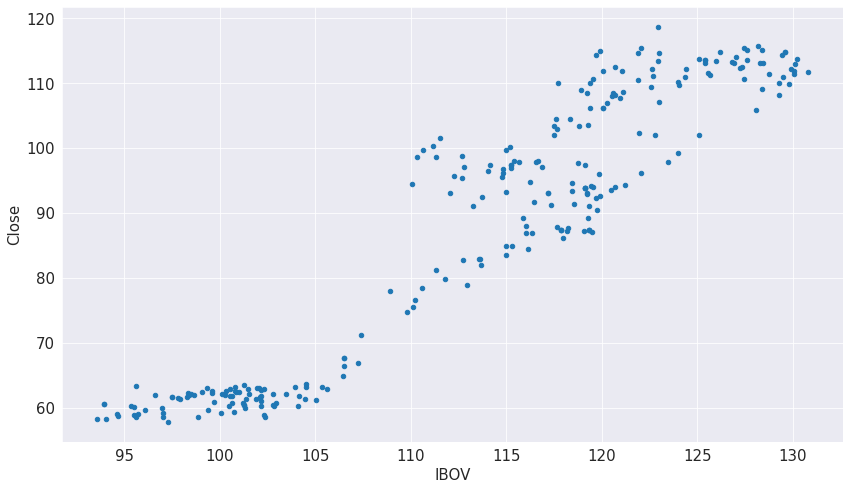

In [19]:
df.plot.scatter('IBOV','Close')

In [20]:
from statsmodels.formula.api import ols

# Ajusta o modelo de regressão linear simples para Close com IBOV/1000 como preditora
modelo = ols('Close ~ IBOV',data=df)
res = modelo.fit()

# valores ajustados de E(Y)
ypred=res.fittedvalues

# resíduo=observado-ajustado
residuo = res.resid


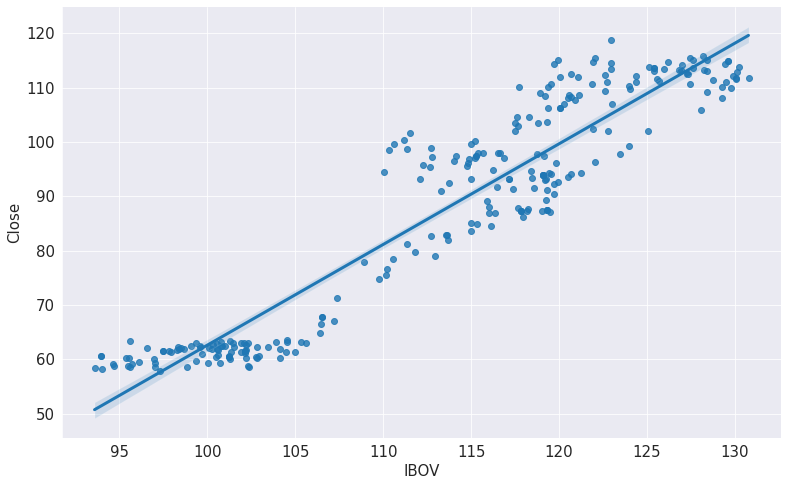

In [21]:
import seaborn as sns


sns.lmplot(y = 'Close', x='IBOV', data=df, height=7, aspect=1.6)

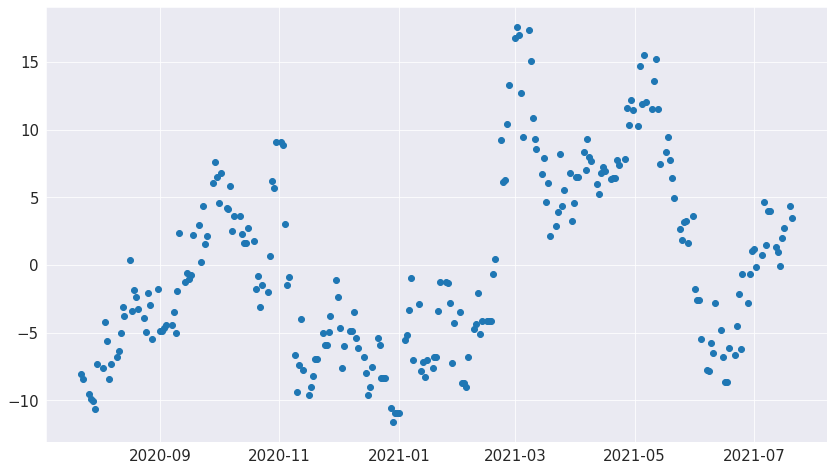

In [22]:
plt.scatter(residuo.index,residuo)

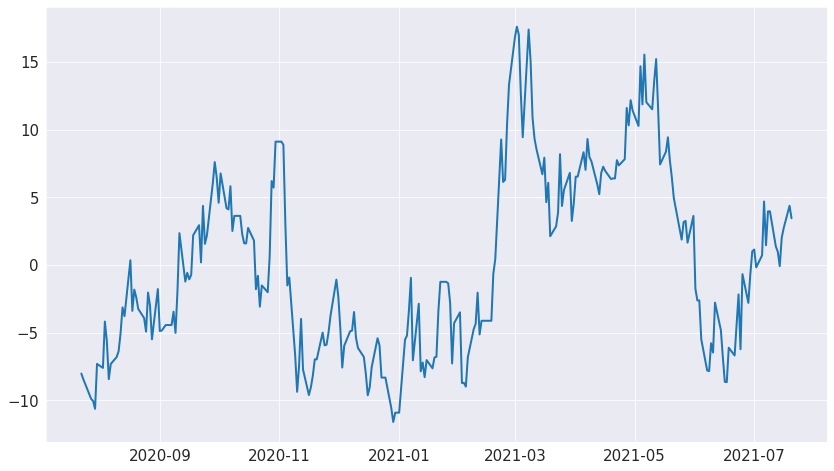

In [23]:
plt.plot(residuo)

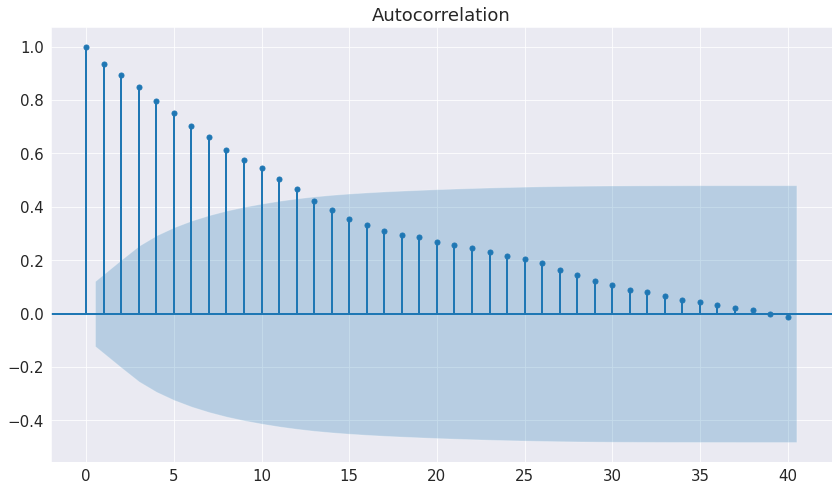

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(residuo, lags=40);

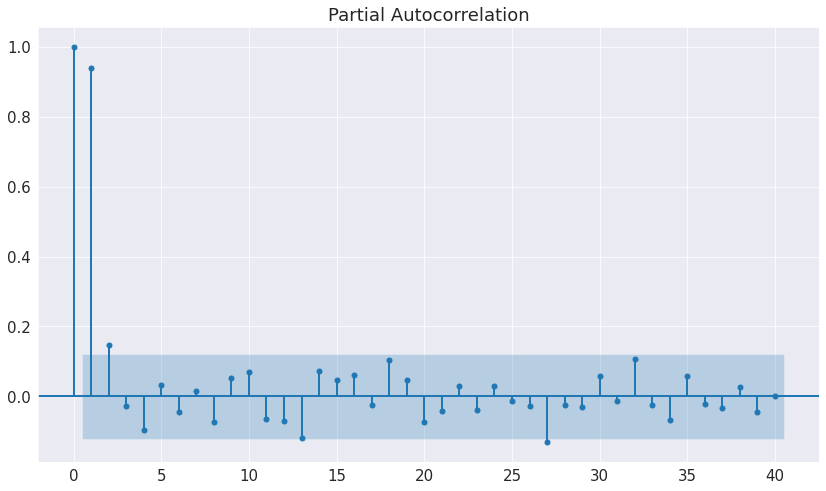

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_pacf(residuo, lags=40);

In [26]:
from pmdarima import auto_arima

In [27]:
stepwise_fit = auto_arima(residuo, start_p=0, start_q=0,
                          max_p=4, max_q=4, 
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1181.645, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1175.336, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1175.677, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1179.736, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1177.334, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1177.335, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1179.298, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1173.471, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1175.469, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1175.470, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1173.818, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1177.427, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.408 seconds


**Tentativa: Um modelo SARIMAX para a série Close do VALE3 utilizando a série Close do Ibovespa como variável exógena considerando order=(1,1,0).**

In [28]:
endog = df['Close']
exog = df['IBOV']

In [29]:
import statsmodels.api as sm

modelo = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,1,0))
resultado = modelo.fit(disp=False)
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  259
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -474.701
Date:                Fri, 19 Aug 2022   AIC                            955.403
Time:                        19:16:57   BIC                            966.062
Sample:                    07-23-2020   HQIC                           959.689
                         - 07-20-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IBOV           0.5793      0.071      8.130      0.000       0.440       0.719
ar.L1         -0.1245      0.058     -2.136      0.033      -0.239      -0.010
sigma2         2.3208      0.183     12.661      0.0

**Exercício: obtenha as previsões passo à frente e dinâmica para os últimos 30 dias com esse modelo e compare com a previsão pelo método Theta. Verifique se ainda existem padrões nos resíduos.**

In [30]:
# Previsão passo a frente
previsao = resultado.get_prediction()
previsao_ip = previsao.conf_int()

# Previsão dinâmica
data_previsao_dinamica = '2021-06-09'

previsao_di = resultado.get_prediction(dynamic=data_previsao_dinamica)
previsao_di_ip = previsao_di.conf_int()


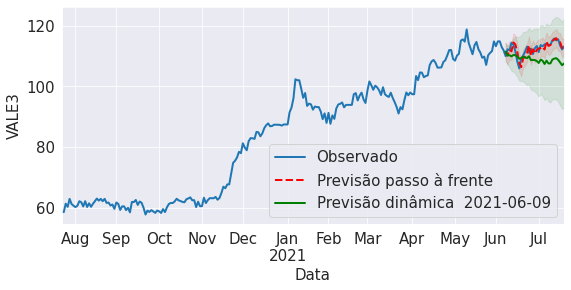

In [31]:
# Visualização dos resultados

# Sobre previsão passo à frente e previsão dinâmica:
# Jackson, E. A. (2018). Comparison between static and dynamic forecast in autoregressive integrated moving average for seasonally adjusted headline consumer price index. Available at SSRN 3162606. Disponível em https://mpra.ub.uni-muenchen.de/86180/1/MPRA_paper_86180.pdf. Acessado em 01/08/2020.

fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='', xlabel='Data', ylabel='VALE3')

# Plota os dados
df.loc['2020-07-23':, 'Close'].plot(ax=ax,  label='Observado')

# Previsões
previsao.predicted_mean.loc['2021-06-08':].plot(ax=ax, style='r--', label='Previsão passo à frente')
ip = previsao_ip.loc['2021-06-08':]
ax.fill_between(ip.index, ip.iloc[:,0], ip.iloc[:,1], color='r', alpha=0.1)

previsao_di.predicted_mean.loc['2021-06-08':].plot(ax=ax, style='g', label='Previsão dinâmica  %s' % data_previsao_dinamica )
ip = previsao_di_ip.loc['2021-06-08':]
ax.fill_between(ip.index, ip.iloc[:,0], ip.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

In [32]:
teste['Passo a frente'] = previsao.predicted_mean.loc['2021-06-08':]
teste['Previsão dinâmica'] = previsao_di.predicted_mean.loc['2021-06-08':]

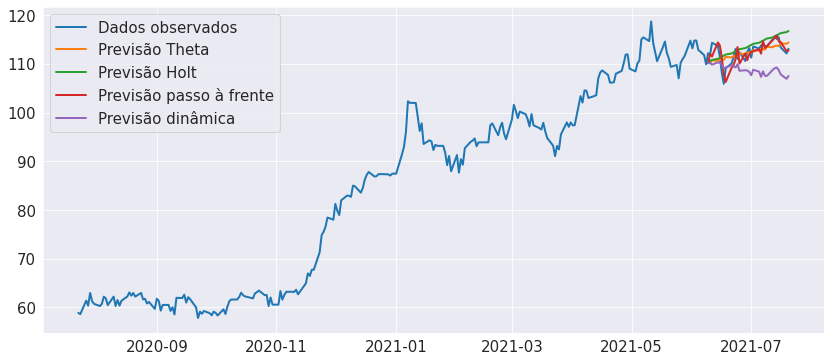

In [33]:
plt.figure(figsize = (14,6))


plt.plot(df['Close'], label='Dados observados')
plt.plot(teste['Theta'], label='Previsão Theta')
plt.plot(teste['Holt'], label='Previsão Holt')
plt.plot(teste['Passo a frente'], label='Previsão passo à frente')
plt.plot(teste['Previsão dinâmica'], label='Previsão dinâmica')


plt.legend()
plt.show()

## Redes dinâmicas - Aula 7

In [34]:
train = pd.DataFrame(df['Close'].iloc[:-30])
test = pd.DataFrame(df['Close'].iloc[-30:])

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(treino)

MinMaxScaler()

In [36]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [37]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# defina o gerador
n_input = 1
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

2022-08-19 19:16:59.077880: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:938] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 19:16:59.082191: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-08-19 19:16:59.082204: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1829] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-08-19 19:16:59.083120: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

Epoch 1/200
228/228 [==============================] - 1s 886us/step - loss: 0.1375
Epoch 2/200
228/228 [==============================] - 0s 878us/step - loss: 0.0307
Epoch 3/200
228/228 [==============================] - 0s 918us/step - loss: 0.0129
Epoch 4/200
228/228 [==============================] - 0s 871us/step - loss: 0.0042
Epoch 5/200
228/228 [==============================] - 0s 814us/step - loss: 0.0018
Epoch 6/200
228/228 [==============================] - 0s 821us/step - loss: 0.0015
Epoch 7/200
228/228 [==============================] - 0s 931us/step - loss: 0.0014
Epoch 8/200
228/228 [==============================] - 0s 947us/step - loss: 0.0014
Epoch 9/200
228/228 [==============================] - 0s 918us/step - loss: 0.0013
Epoch 10/200
228/228 [==============================] - 0s 837us/step - loss: 0.0013
Epoch 11/200
228/228 [==============================] - 0s 810us/step - loss: 0.0014
Epoch 12/200
228/228 [==============================] - 0s 865us/step - lo

228/228 [==============================] - 0s 823us/step - loss: 8.4892e-04
Epoch 186/200
228/228 [==============================] - 0s 838us/step - loss: 8.3099e-04
Epoch 187/200
228/228 [==============================] - 0s 863us/step - loss: 8.6312e-04
Epoch 188/200
228/228 [==============================] - 0s 799us/step - loss: 9.0989e-04
Epoch 189/200
228/228 [==============================] - 0s 822us/step - loss: 8.5724e-04
Epoch 190/200
228/228 [==============================] - 0s 814us/step - loss: 8.7834e-04
Epoch 191/200
228/228 [==============================] - 0s 871us/step - loss: 8.6806e-04
Epoch 192/200
228/228 [==============================] - 0s 814us/step - loss: 8.8392e-04
Epoch 193/200
228/228 [==============================] - 0s 805us/step - loss: 8.9214e-04
Epoch 194/200
228/228 [==============================] - 0s 822us/step - loss: 8.4641e-04
Epoch 195/200
228/228 [==============================] - 0s 829us/step - loss: 8.9670e-04
Epoch 196/200
228/228 [=

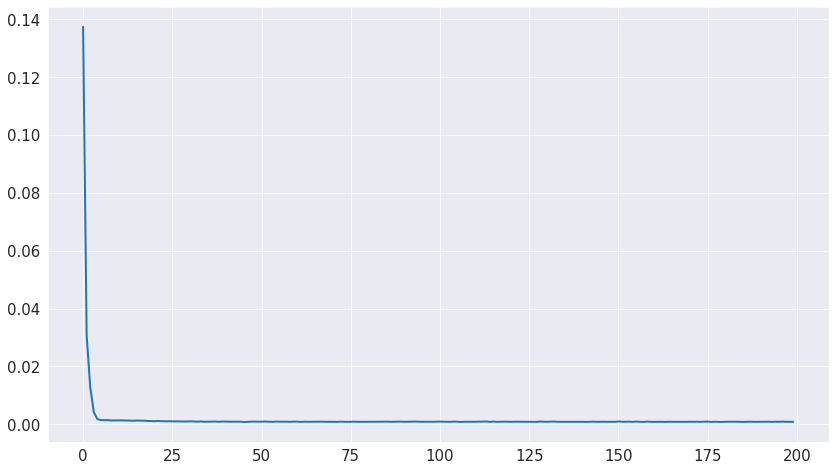

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

n_features = 1

# Defina o modelo
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# Ajuste do modelo
model.fit(generator,epochs=200)

loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

# Agora vamos considerar as previsões para as próximas observações e comparar com a base de teste

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # obter a previsão de tempo 1 antecipadamente ([0] é para pegar apenas o número em vez de [array])
    current_pred = model.predict(current_batch)[0]
    
    # predição
    test_predictions.append(current_pred) 
    
    # atualize a rodada para agora incluir a previsão e descartar o primeiro valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    


In [39]:
true_predictions = scaler.inverse_transform(test_predictions)
teste['LSTM'] = true_predictions

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [41]:
mean_absolute_error(teste['Close'],teste['Holt'])

1.7622804010832998

In [42]:
mean_absolute_error(teste['Close'],teste['Theta'])

1.4322421989873344

In [43]:
mean_absolute_error(teste['Close'],teste['Passo a frente'])

1.293956289430586

In [44]:
mean_absolute_error(teste['Close'],teste['Previsão dinâmica'])

3.957282336722732

In [45]:
mean_absolute_error(teste['Close'],teste['LSTM'])

1.4288581562859528

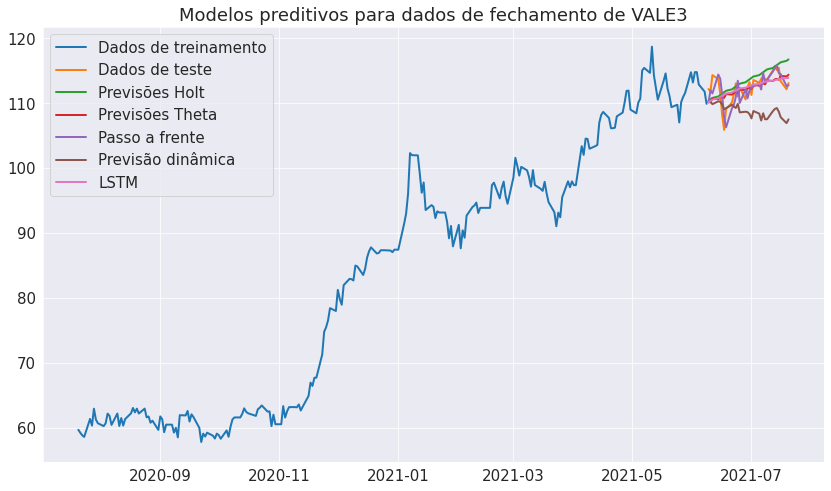

In [46]:
plt.plot(treino['Close'], label = 'Dados de treinamento')
plt.plot(teste['Close'], label = 'Dados de teste')
plt.plot(teste['Holt'], label = 'Previsões Holt')
plt.plot(teste['Theta'], label = 'Previsões Theta')
plt.plot(teste['Passo a frente'], label = 'Passo a frente')
plt.plot(teste['Previsão dinâmica'], label = 'Previsão dinâmica')
plt.plot(teste['LSTM'], label = 'LSTM')
            
plt.title('Modelos preditivos para dados de fechamento de VALE3')
plt.legend()
plt.show()

**Repita os procedimentos para obter previsões para dados futuros, ou seja, utilizando todos os dados disponíveis e fazendo previsões para os próximos 20 dias.**